Authors: </br>
Valerio Baldi 1940729 </br>
Saverio Dieni 1946039 </br>

Selected paper: <br/>
[**Retrieval-Augmented Diffusion Models for Time Series Forecasting**](https://openreview.net/pdf?id=dRJJt0Ji48)

# References

Paper: [**Retrieval-Augmented Diffusion Models for Time Series Forecasting**](https://openreview.net/pdf?id=dRJJt0Ji48)<br/>
Dataset: [**HouseTS Dataset from Kaggle**](https://www.kaggle.com/datasets/shengkunwang/housets-dataset)

# Project aim and paper description

The project aims to implement a generative model for time-series forecasting, applying it to a house-price and socioeconomic dataset. As demostrated in the paper, the model improves the general diffusion model framework by adding embedding-based retrieval mechanism that retrieves series sharing similar patterns from a reference database. It improves the model generation by exploiting the references, to overcome the lack of guidance in the forecasting process, leading to more accurate and context-aware forecasts.<br/>
In particular the framework proposed in the paper suggested to use a pre-trained encoder for time-series. The encoder compresses time-series, simplifying the task of finding series with similar patterns. It is also produced an index of the embeddings for a fast retrieval of the reference. </br> 

# Theoretical background and key concepts

Retrieval-Augmented Time-Series Diffusion (RATD) is based on the theory of diffusion probabilistic models, which are generative models that learn to reverse a Markovian forward noising process. These models are designed to learn the reverse of a forward noising process, where an original sample x0​ is progressively corrupted into xT​. <br/>

The model takes as input a time-series, where the tail of the series is completely filled with noise, and the model is able to recostruct the original signal, exploiting the context retrieved by the head of the series, the references and the side information.</br>

As previously described, the references were found by looking at the k-nearest neighbours in a lower dimensional space, with respect to the head of the series, and we take as references the tails of those neighbours. <br/>

The side information is obtained by concatenating the temporal embeddings with the feature embeddings, where the temporal embeddings are sinusoidal positional embeddings, while the feature embeddings are learnable positional embeddings.  

These embeddings are concatenated and fed into attention modules based on a Transformer architecture.

The model adopts a lightweight attention mechanism inspired by CSDI, consisting of alternating temporal and feature Transformer layers. By using linear attention, RATD is able to handle long sequences and large datasets more efficiently.

# Reproducibility

We both launched this notebook on our machines and on Kaggle notebooks. Before starting the process is required to import all the modules defined in the import section. It is also necessary to have available the auto-encoder for housets defined in the notebook "autoencoder_for_housets.ipynb". You can direclty find the pre-trained auto-encoder model in the folder "models", with the name "encoder.pth".

# Import

In [1]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 55.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install linear-attention-transformer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

In [3]:
pip install torch_timeseries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.1/87.1 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 16.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 47.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for torch_timeseries: filename=torch_timeseries-0.1.10-py3-none-any.whl size=140280 sha256=260014b8b9a0616134c0729c39f8c855f5688d4d2b44105f2b40251a2f38790e
  Stored in directory: /root/.cache/pip/wheels/cc/1d/11/e1994b0a3efa97cfb326ff336da7fb4cde8c46c52e5bc901da
Successfully built torch_timeseries
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.7.3
    Uninstalling torchmetrics-1.7.3:
      Su

In [4]:
import torch
import torch.nn as nn
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
from linear_attention_transformer import LinearAttentionTransformer
import math 
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import faiss
from IPython.display import display
import random
from sklearn.utils import shuffle

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" # conflict between faiss and pytorch libraries 

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data extraction and preprocessing

In this section we extract the time series from the CSV file. <br/>
The original dataset contains entries of the form <date, median_sale_price, median_list_price, median_ppsf, median_list_ppsf, homes_sold, pending_sales, new_listings, inventory, median_dom, avg_sale_to_list, sold_above_list, off_market_in_two_weeks, city, zipcode, year, bank, bus, hospital, mall, park, restaurant, school, station, supermarket, Total Population, Median Age, Per Capita Income, Total Families Below Poverty, Total Housing Units, Median Rent,Median Home Value, Total Labor Force, Unemployed Population, Total School Age Population, Total School Enrollment, Median Commute Time, price, city_full>, where the combination of <zipcode, year> is a key for the dataset. 
The HouseTS dataset contains also satellite images, grouped by zipocode in different folders. For this reason we decided to keep only the entries relative to zones linked to images. 
The zipcode is a representative value for each zone of Washington.</br>
We extract time series of length of 24 steps (24 months), where our final aim is to predict the last 12 timesteps given the previous 12s. </br>
As preprocessing we dropped non relevant features in this simplified scenario, and we also extracted metadata: zipcode, timestamp, year.  

In [6]:
window_length = 168 + 192
step_size = 1

In [7]:
csv_file = "/kaggle/input/ettsmall/ETTm1.csv"
df = pd.read_csv(csv_file)

In [8]:
# 1. Order by date
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

def extract_windows(df, window_len, step):
    windows = []
    timestamps = []
    
    # Drop non-numeric columns for window extraction
    numeric_df = df.drop(columns=["date"])
    
    for i in range(step - 1, len(df) - window_len + 1, step):
        # Window of numeric features
        window = numeric_df.iloc[i:i+window_len].values
        windows.append(window)
        
        # Associate timestamps
        timestamps.append(df["date"].iloc[i:i+window_len].values)
    
    return np.array(windows), np.array(timestamps)

all_windows, all_timestamps = extract_windows(df, window_length, step_size)

X = all_windows  # shape: (num_samples, window_length, num_features)
meta_time = all_timestamps  # metadata: array of associated dates

print("Shape of X:", X.shape)               # (num_samples, window_length, num_features)
print("Shape of meta_time:", meta_time.shape)  # (num_samples, window_length)

Shape of X: (69321, 360, 7)
Shape of meta_time: (69321, 360)


We shuffled the dataset fixing the seed for replication purposes, then we splitted the dtaset for the training, evaluation and testing, respectively with a proportion 70%, 10% 20%. We normalized the datasets, according to the training dataset. Finally we created the DataLoaders, with a batch size of 32. 

In [9]:
# Ensure the dataframe is sorted by date
df["date"] = pd.to_datetime(df["date"])

# Define time boundaries
start_date = df["date"].min()
train_end = start_date + pd.DateOffset(months=12)
val_end = train_end + pd.DateOffset(months=4)

# Create masks for each split
train_mask = [all(d < train_end for d in window) for window in meta_time]
val_mask   = [all((d >= train_end) and (d < val_end) for d in window) for window in meta_time]
test_mask  = [all(d >= val_end for d in window) for window in meta_time]

# Apply the masks
X_train = X[train_mask]
X_val   = X[val_mask]
X_test  = X[test_mask]

meta_train = [m for m, flag in zip(meta_time, train_mask) if flag]
meta_val   = [m for m, flag in zip(meta_time, val_mask) if flag]
meta_test  = [m for m, flag in zip(meta_time, test_mask) if flag]

print(len(X_train), len(X_val), len(X_test))

34681 11449 22473


In [10]:
class TimeSeriesDataset(torch.utils.data.Dataset):
    def __init__(self, X, meta, seq_len=None):
        self.X = torch.tensor(X, dtype=torch.float32) if not isinstance(X, torch.Tensor) else X
        self.meta = meta
        self.seq_len = seq_len or X.shape[1]

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        meta_window = self.meta[idx]
        
        # Convert dates → UNIX timestamps
        timestamps = [int(pd.Timestamp(date).timestamp()) for date in meta_window]
        years = [pd.Timestamp(date).year for date in meta_window]
        
        return x, torch.tensor(timestamps, dtype=torch.long), torch.tensor(years, dtype=torch.long)


In [11]:
# Compute the statistics of the train dataset and normalize with respect to it 
mean = X_train.mean(axis=(0, 1), keepdims=True)  # shape (1, 1, num_features)
std = X_train.std(axis=(0, 1), keepdims=True)

X_train_norm = (X_train - mean) / std
X_val_norm = (X_val - mean) / std
X_test_norm = (X_test - mean) / std

train_dataset = TimeSeriesDataset(X_train_norm, meta_train)
val_dataset = TimeSeriesDataset(X_val_norm, meta_val)
test_dataset = TimeSeriesDataset(X_test_norm, meta_test)

X_train_tensor =  train_dataset.X

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


# Retrieval Database

We reloaded the pre-trained encoder-decoder to embed the train dataset and build an efficient retrieval database for top k nearest neighbours search. 

# Mean Estimator

In [12]:
def build_x_mark_enc_vectorized(timestamps):
    """
    timestamps: tensor (B, T) of UNIX timestamps
    returns: tensor (B, T, 5) -> [minute, hour, weekday, day, month]
    """
    B, T = timestamps.shape
    x_mark = torch.zeros(B, T, 5)

    # Flatten, convert to datetime, then reshape
    ts_flat = timestamps.cpu().numpy().reshape(-1)
    ts_dt = pd.to_datetime(ts_flat, unit='s')

    # Extract features
    minute = torch.tensor(ts_dt.minute.values.reshape(B, T)) / 59.0
    hour   = torch.tensor(ts_dt.hour.values.reshape(B, T)) / 23.0
    weekday= torch.tensor(ts_dt.weekday.values.reshape(B, T)) / 6.0
    day    = torch.tensor(ts_dt.day.values.reshape(B, T)) / 31.0
    month  = torch.tensor(ts_dt.month.values.reshape(B, T)) / 12.0

    x_mark[:, :, 0] = minute
    x_mark[:, :, 1] = hour
    x_mark[:, :, 2] = weekday
    x_mark[:, :, 3] = day
    x_mark[:, :, 4] = month

    return x_mark.float()


In [13]:
from torch_timeseries.nn.Transformer_EncDec import Decoder, DecoderLayer, Encoder, EncoderLayer
from torch_timeseries.nn.SelfAttention_Family import DSAttention, AttentionLayer
from torch_timeseries.nn.embedding import DataEmbedding

class Projector(nn.Module):
    '''
    MLP to learn the De-stationary factors
    '''

    def __init__(self, input_dim, seq_len, hidden_dims, hidden_layers, output_dim, kernel_size=3):
        super(Projector, self).__init__()

        padding = kernel_size // 2
        self.series_conv = nn.Conv1d(in_channels=seq_len, out_channels=1, kernel_size=kernel_size, padding=padding,
                                     padding_mode='circular', bias=False)

        layers = [nn.Linear(2 * input_dim, hidden_dims[0]), nn.ReLU()]
        for i in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_dims[i], hidden_dims[i + 1]), nn.ReLU()]

        layers += [nn.Linear(hidden_dims[-1], output_dim, bias=False)]
        self.backbone = nn.Sequential(*layers)

    def forward(self, x, stats):
        # x:     B x T x D
        # stats: B x 1 x D
        # y:     B x O
        batch_size = x.shape[0]
        x = self.series_conv(x)  # B x 1 x D
        x = torch.cat([x, stats], dim=1)  # B x 2 x D
        x = x.view(batch_size, -1)  # B x 2D
        y = self.backbone(x)  # B x O

        return y

class MeanEstimator(nn.Module):
    """
    Non-stationary Transformer (potenziato)
    """

    def __init__(self,
                 seq_len: int,
                 pred_len: int,
                 input_dim: int,
                 window_size: int = 96,
                 d_model: int = 512,
                 n_heads: int = 8,
                 e_layers: int = 2,
                 d_layers: int = 1,
                 dropout: float = 0.1,
                 activation: str = "gelu",
                 embed: str = "learnable",
                 freq: str = "15T",
                 factor: int = 1,
                 output_attention: bool = False,
                 p_hidden_dims=(128, 128),
                 p_hidden_layers: int = 2,
                 beta_kl: float = 1e-3):  # coefficiente KL
        super(MeanEstimator, self).__init__()

        self.pred_len = pred_len
        self.seq_len = seq_len
        self.window_size = window_size
        self.beta_kl = beta_kl

        # 🔹 Conv1d front-end
        self.conv_in = nn.Conv1d(input_dim, d_model, kernel_size=3, padding=1)

        # Embedding
        self.enc_embedding = DataEmbedding(d_model, d_model, embed, freq, dropout)
        self.dec_embedding = DataEmbedding(d_model, d_model, embed, freq, dropout)

        # Encoder
        self.encoder = Encoder(
            [
                EncoderLayer(
                    AttentionLayer(
                        DSAttention(False, factor, attention_dropout=dropout,
                                    output_attention=output_attention),
                        d_model, n_heads),
                    d_model,
                    d_model,
                    dropout=dropout,
                    activation=activation
                ) for _ in range(e_layers)
            ],
            norm_layer=nn.LayerNorm(d_model)
        )

        # Decoder
        self.decoder = Decoder(
            [
                DecoderLayer(
                    AttentionLayer(
                        DSAttention(True, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    AttentionLayer(
                        DSAttention(False, factor, attention_dropout=dropout, output_attention=False),
                        d_model, n_heads),
                    d_model,
                    d_model,
                    dropout=dropout,
                    activation=activation,
                )
                for _ in range(d_layers)
            ],
            norm_layer=nn.LayerNorm(d_model),
            projection=nn.Linear(d_model, input_dim, bias=True)
        )

        # Tau / Delta learners
        self.tau_learner = Projector(input_dim=input_dim, seq_len=seq_len,
                                     hidden_dims=p_hidden_dims,
                                     hidden_layers=p_hidden_layers,
                                     output_dim=1)
        self.delta_learner = Projector(input_dim=input_dim, seq_len=seq_len,
                                       hidden_dims=p_hidden_dims,
                                       hidden_layers=p_hidden_layers,
                                       output_dim=seq_len)

        # 🔹 Latent space con residual + dropout
        self.z_mean = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model, d_model)
        )
        self.z_logvar = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model, d_model)
        )
        self.z_out = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model, d_model)
        )

        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def kl_loss(self, mean, logvar):
        # KL divergence standard per VAE
        return -0.5 * torch.mean(1 + logvar - mean.pow(2) - logvar.exp())

    def reparameterize(self, mean, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mean + eps * std
        else:
            return mean

    def forward(self, x_enc, x_mark_enc, x_dec, x_mark_dec,
                enc_self_mask=None, dec_self_mask=None, dec_enc_mask=None,
                return_kl=False):

        x_raw = x_enc.clone().detach()

        # 🔹 Normalization
        mean_enc = x_enc.mean(1, keepdim=True).detach()
        x_enc = x_enc - mean_enc
        std_enc = torch.sqrt(torch.var(x_enc, dim=1, keepdim=True, unbiased=False) + 1e-8).detach()
        x_enc = x_enc / std_enc

        # 🔹 Conv1d front-end
        x_enc = self.conv_in(x_enc.transpose(1, 2)).transpose(1, 2)

        # Decoder input
        x_dec_new = torch.cat(
            [x_enc[:, -self.window_size:, :],
             torch.zeros((x_enc.size(0), self.pred_len, x_enc.size(2)), device=x_enc.device)],
            dim=1
        )

        tau = self.tau_learner(x_raw, std_enc).exp()
        delta = self.delta_learner(x_raw, mean_enc)

        # Model Inference
        enc_out = self.enc_embedding(x_enc, x_mark_enc)
        enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask, tau=tau, delta=delta)

        # 🔹 Latent space VAE-style
        mu = self.z_mean(enc_out)
        logvar = self.z_logvar(enc_out)
        z = self.reparameterize(mu, logvar)
        z = self.z_out(z)
        enc_out = enc_out + z  # residual injection

        dec_out = self.dec_embedding(x_dec_new, x_mark_dec)
        dec_out = self.decoder(dec_out, enc_out, x_mask=dec_self_mask, cross_mask=dec_enc_mask,
                               tau=tau, delta=delta)

        # De-normalization
        dec_out = dec_out * std_enc + mean_enc

        if return_kl:
            kl = self.kl_loss(mu, logvar)
            return dec_out[:, -self.pred_len:, :], dec_out, self.beta_kl * kl
        else:
            return dec_out[:, -self.pred_len:, :], dec_out


2025-09-19 18:06:53.053829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758305213.405837      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758305213.516056      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# ============================
# Loss combinata (MSE + MAE)
# ============================
def combined_loss(y_pred, y_true, mse_weight=1.0, mae_weight=0.2):
    mse = nn.MSELoss()(y_pred, y_true)
    mae = nn.L1Loss()(y_pred, y_true)
    return mse_weight * mse + mae_weight * mae, mse, mae

# ============================
# Training loop aggiornato
# ============================
def train_mean_estimator(model, train_loader, val_loader, device, 
                         epochs=50, base_lr=1e-4, warmup_steps=1000):

    model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=base_lr, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs * len(train_loader))

    best_val_loss = float("inf")
    patience, patience_counter = 10, 0

    global_step = 0

    for epoch in range(epochs):
        model.train()
        train_mse_total = 0.0
        train_batches = 0

        for batch in train_loader:
            x, timestamps, _ = [b.to(device) for b in batch]

            x_enc = x[:, :model.seq_len, :].to(device).float()
            y_true = x[:, model.seq_len:, :].to(device).float()
            
            # Vectorized timestamp embedding
            timestamps_enc = timestamps[:, :model.seq_len]
            x_mark_enc = build_x_mark_enc_vectorized(timestamps_enc).to(device)
            
            # Decoder inizializzato a zero
            x_dec = torch.zeros((x_enc.size(0), model.pred_len, x_enc.size(2)), device=device)
            x_mark_dec = torch.zeros((x_enc.size(0), model.pred_len + model.window_size, 5), device=device)

            optimizer.zero_grad()
            y_pred, _, kl = model(x_enc, x_mark_enc, x_dec, x_mark_dec, return_kl=True)

            # Reconstruction loss (MSE + MAE)
            loss_recon, mse, mae = combined_loss(y_pred, y_true)

            # Loss totale
            loss = loss_recon + kl

            # Backprop
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_mse_total += mse.item()
            train_batches += 1
            global_step += 1

        avg_train_mse = train_mse_total / train_batches

        # ============================
        # Validation
        # ============================
        model.eval()
        val_mse_total = 0.0
        val_batches = 0
        with torch.no_grad():
            for batch in val_loader:
                x, timestamps, _ = [b.to(device) for b in batch]

                x_enc = x[:, :model.seq_len, :].to(device).float()
                y_true = x[:, model.seq_len:, :].to(device).float()
                
                timestamps_enc = timestamps[:, :model.seq_len]
                x_mark_enc = build_x_mark_enc_vectorized(timestamps_enc).to(device)
                
                x_dec = torch.zeros((x_enc.size(0), model.pred_len, x_enc.size(2)), device=device)
                x_mark_dec = torch.zeros((x_enc.size(0), model.pred_len + model.window_size, 5), device=device)
    
                y_pred, _, _ = model(x_enc, x_mark_enc, x_dec, x_mark_dec, return_kl=True)

                _, mse_loss, _ = combined_loss(y_pred, y_true)
                val_mse_total += mse_loss.item()
                val_batches += 1

        avg_val_mse = val_mse_total / val_batches
        print(f"Epoch {epoch+1}/{epochs} | Train MSE: {avg_train_mse:.4f} | Val MSE: {avg_val_mse:.4f}")

        # ============================
        # Early stopping
        # ============================
        if avg_val_mse < best_val_loss:
            best_val_loss = avg_val_mse
            patience_counter = 0
            torch.save(model.state_dict(), "best_mean_estimator.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break


In [44]:
model = MeanEstimator(
    seq_len=168,          # lunghezza della finestra di input
    pred_len=192,         # lunghezza della predizione
    input_dim=7,          # numero di feature nel dataset
    window_size=96,
    d_model=256,          # più piccolo, meno overfitting
    n_heads=8,            # dimezzato
    e_layers=1,           # encoder più corto
    d_layers=1,           # decoder semplice
    dropout=0.1,         # aumenta la regolarizzazione
    activation="gelu",
    embed="learnable",
    freq="15T",
    factor=1,
    p_hidden_dims=(128, 128),  # proiettori più piccoli
    p_hidden_layers=2,
    beta_kl=0.1         # peso della KL loss
).to(device)

In [45]:
train_mean_estimator(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    epochs=50,        # puoi aumentare se non converge
    base_lr=1e-4,     # learning rate di partenza
    warmup_steps=1000
)

Epoch 1/50 | Train MSE: 0.4635 | Val MSE: 0.6413
Epoch 2/50 | Train MSE: 0.3026 | Val MSE: 0.5791
Epoch 3/50 | Train MSE: 0.2417 | Val MSE: 0.6204
Epoch 4/50 | Train MSE: 0.2039 | Val MSE: 0.6530
Epoch 5/50 | Train MSE: 0.1764 | Val MSE: 0.6710
Epoch 6/50 | Train MSE: 0.1562 | Val MSE: 0.6534
Epoch 7/50 | Train MSE: 0.1406 | Val MSE: 0.6407
Epoch 8/50 | Train MSE: 0.1283 | Val MSE: 0.6628
Epoch 9/50 | Train MSE: 0.1188 | Val MSE: 0.6541
Epoch 10/50 | Train MSE: 0.1103 | Val MSE: 0.6593
Epoch 11/50 | Train MSE: 0.1039 | Val MSE: 0.6515
Epoch 12/50 | Train MSE: 0.0979 | Val MSE: 0.6547
Early stopping triggered


# Sigma Estimator

In [15]:
def y_sigma(x, window_size=96, pred_len = 192):
    """
    Compute variance using a sliding window.
    Args:
    x (torch.Tensor): Input tensor (B, n + h, D).
    window_size (int): Sliding window size (default: 96).
    Returns:
    torch.Tensor: Variance tensor (B, h, N).
    """
    windows = x.unfold(1, window_size, 1) # Create sliding windows
    sigma = windows.var(dim=3, unbiased=False) # Compute variance
    return sigma[:, -pred_len:, :] # Extract output step variance

In [16]:
def wv_sigma_trailing(x, window_size):
    """
    Compute the variance over a trailing window for each time step.

    For each time step t, the variance is calculated over the window [t - window_size, t - 1].

    Args:
        x (Tensor): Input tensor of shape (B, n, D)
        window_size (int): Size of the trailing window

    Returns:
        sigma (Tensor): Variance tensor of shape (B, n, N)
    """

    B, n, D = x.shape

    if window_size < 1 or window_size > n:
        raise ValueError(f"window_size must be between 1 and T (got window_size={window_size}, n={n})")

    # Create sliding windows of size window_size along the T dimension
    # Each window will cover [t - window_size, t - 1] after padding
    # The resulting shape will be (B, n, window_size, D)
    windows = x.unfold(1, window_size + 1, 1) 

    # Compute variance across the window dimension (dim=2)
    sigma = windows.var(dim=3, unbiased=False)  # Shape: (B, n, D)
    return sigma

In [17]:
class SigmaEstimator(nn.Module):
    """
    Sigma Estimation module
    """
    def __init__(self, seq_len, pred_len, hidden_size=512, kernel_size=96):
        super(SigmaEstimator, self).__init__()
        self.pred_len = pred_len
        self.seq_len = seq_len
        self.hidden_size = hidden_size
        self.kernel_size = kernel_size  

        # 2-layer MLP for predicting future sigmas
        self.mlp = nn.Sequential(
            nn.Linear(seq_len - kernel_size, hidden_size),
            nn.GELU(),
            nn.Linear(hidden_size, hidden_size),
            nn.GELU(),
            nn.Linear(hidden_size, pred_len)   # outputs pred_len future sigmas
        )

    def forward(self, x):
        """
        x: (B, n, D)
        return: (B, pred_len, D)
        """
        B, n, D = x.shape

        # 1. Compute trailing sigma (moving variance/stddev)
        sigma = wv_sigma_trailing(x, self.kernel_size)   # -> (B, n - kernel_size, D)
        
        # 2. Predict future sigmas using MLP
        pred_sigma = self.mlp(sigma.permute(0, 2, 1))  # (B, D, n-kernel) -> (B, D, pred_len)

        # 3. Ensure positivity
        pred_sigma = F.softplus(pred_sigma)

        # 4. Reshape back to (B, pred_len, D)
        return pred_sigma.permute(0, 2, 1)

In [18]:
"""# Instantiate the Sigma Estimator
sigma_estimator = SigmaEstimator(seq_len = 168, pred_len = 192, hidden_size=32).to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Model parameters: {count_parameters(sigma_estimator):,}")

params = list(sigma_estimator.parameters())

optimizer = torch.optim.Adam(params, lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 100

patience = 10
patience_counter = 0

best_loss = 1e10

encoder_path = "models/sigma_estimator.pth"

def evaluate(model, loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, _, _  in loader:
            x = x.to(device)
            x_hat = model(x[:, :168, :])
            loss = loss_fn(x_hat, y_sigma(x))
            total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(1, epochs + 1):
    sigma_estimator.train()
    train_loss = 0

    for x, _, _ in train_loader:
        x = x.to(device)
        x_hat = sigma_estimator(x[:, :168, :])
        loss = loss_fn(x_hat, y_sigma(x))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    val_loss = evaluate(sigma_estimator, val_loader)
    test_loss = evaluate(sigma_estimator, test_loader)

    if val_loss + test_loss < best_loss:
        best_loss = val_loss + test_loss
        # Saves the weights
        torch.save(sigma_estimator.state_dict(), encoder_path)
        print("Models saved successfully.")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    print(f"Epoch {epoch:02d} | Train MSE: {train_loss:.6f} | Val MSE: {val_loss:.6f} | Test MSE: {test_loss:.6f}")"""

'# Instantiate the Sigma Estimator\nsigma_estimator = SigmaEstimator(seq_len = 168, pred_len = 192, hidden_size=32).to(device)\n\ndef count_parameters(model):\n    return sum(p.numel() for p in model.parameters() if p.requires_grad)\n\nprint(f"Model parameters: {count_parameters(sigma_estimator):,}")\n\nparams = list(sigma_estimator.parameters())\n\noptimizer = torch.optim.Adam(params, lr=1e-3)\nloss_fn = nn.MSELoss()\n\nepochs = 100\n\npatience = 10\npatience_counter = 0\n\nbest_loss = 1e10\n\nencoder_path = "models/sigma_estimator.pth"\n\ndef evaluate(model, loader):\n    model.eval()\n    total_loss = 0\n    with torch.no_grad():\n        for x, _, _  in loader:\n            x = x.to(device)\n            x_hat = model(x[:, :168, :])\n            loss = loss_fn(x_hat, y_sigma(x))\n            total_loss += loss.item()\n    return total_loss / len(loader)\n\nfor epoch in range(1, epochs + 1):\n    sigma_estimator.train()\n    train_loss = 0\n\n    for x, _, _ in train_loader:\n       

# Model

In this section we developed the RATD model according to the descriptions and the graphical representations reported in the paper.</br> </br>
<img src="ratd_architecture.png"> </br></br>
We started from the implementation of the module regarding the side information (time embeddings + feature embeddings) and the diffusion timestep embeddings. 
Then we implemented the other blocks lik the RMA (Reference Modulated Attention) module, the Time and the Feature Tranformers, starting from the implementation provived by LinearAttentionTransformer, and finally the GAU (Gated Activation Unit) module. </br>
We composed all together these blocks in the module RATDLayer, that includes all the computations done in a single step of the model. Lastly we implemented the complete RATD model, by stacking the layers and applying additonal computations adding the noise to the input, initializing the side information and the diffiusion timestep embedding, and finally processing the results of each layer.    

In [19]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [20]:
class CausalConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, 
                 stride=1, padding=0, dilation=1, bias=True, mask = None):
        super().__init__()
        
        if isinstance(kernel_size, int):
            kernel_size = (kernel_size, kernel_size)
        self.kernel_size = kernel_size

        # Standard Conv2d layer
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size,
                              stride=stride, padding=padding, dilation=dilation, bias=bias)

        # Build causal mask
        if mask is None:
            mask = self._build_causal_mask(kernel_size)
        self.register_buffer("mask", mask)

    def _build_causal_mask(self, kernel_size):
        """Create a causal mask of shape (kH, kW)."""
        kH, kW = kernel_size
        mask = torch.ones(kH, kW, dtype=torch.float32)
        return mask

    def forward(self, x):
        # Apply mask to conv weights before convolution
        # Weight shape: (out_channels, in_channels, kH, kW)
        w = self.conv.weight * self.mask
        return F.conv2d(x, w, bias=self.conv.bias, stride=self.conv.stride,
                        padding=self.conv.padding, dilation=self.conv.dilation)

In [21]:
class SideInformation(nn.Module):
    def __init__(self, num_features: int, time_dim: int = 32, feat_dim: int = 16, base: int = 10000):
        """
        time_dim: dimension of the sinusoidal time embeddings
        feat_dim: dimension of the feature embeddings
        """
        super().__init__()
        self.num_features = num_features
        self.time_dim = time_dim
        self.feat_dim = feat_dim
        self.total_dim = time_dim + feat_dim  # 144, as in the paper 
        self.base = base

        # Learnable feature embedding: (num_features, feat_dim)
        self.feature_embedding = nn.Parameter(torch.randn(num_features, feat_dim))

    def forward(self, timestamps: torch.Tensor) -> torch.Tensor:
        """
        timestamps: (batch, seq_len)
        Returns:
            side_info Is: (batch, total_dim, seq_len, num_features)
        """
        batch_size, seq_len = timestamps.shape
        device = timestamps.device

        # Temporal sinusoidal embedding 
        positions = timestamps.float().unsqueeze(-1)  # (batch, seq_len, 1)
        div_term = torch.exp(
            torch.arange(0, self.time_dim, 2, device=device) * -(np.log(self.base) / self.time_dim)
        )  # (time_dim/2,)
        sin_embed = torch.sin(positions * div_term)  # (batch, seq_len, time_dim/2)
        cos_embed = torch.cos(positions * div_term)  # (batch, seq_len, time_dim/2)
        time_emb = torch.cat([sin_embed, cos_embed], dim=-1)  # (batch, seq_len, time_dim)

        # Feature embedding learnable 
        feat_emb = self.feature_embedding.unsqueeze(0).unsqueeze(0)  # (1, 1, num_features, feat_dim)
        feat_emb = feat_emb.expand(batch_size, seq_len, -1, -1)      # (batch, seq_len, num_features, feat_dim)

        # Expand time embedding to match num_features 
        time_emb = time_emb.unsqueeze(2).expand(-1, -1, self.num_features, -1)  # (batch, seq_len, num_features, time_dim)

        # Concatenate 
        side_info = torch.cat([time_emb, feat_emb], dim=-1)  # (batch, seq_len, num_features, total_dim)

        # Permute: (batch, total_dim, seq_len, num_features)
        side_info = side_info.permute(0, 3, 1, 2)

        return side_info  # Is


The RMA module was built following the structure provided in the paper, as shown in the image below:</br></br>
<img src="RMA_module.png"></br></br>
The module use attention on the references and on the side information to guide the generation process.

In [22]:
class MultiHeadRMA(nn.Module): 
    def __init__(self, input_dim, inner_dim=128, n_heads=4):
        super().__init__()
        assert inner_dim % n_heads == 0, "inner_dim deve essere divisibile per n_heads"
        self.n_heads = n_heads
        self.head_dim = inner_dim // n_heads

        # Proiezioni lineari
        self.q_proj = nn.Linear(input_dim, inner_dim)
        self.k_proj = nn.Linear(2 * input_dim, inner_dim)
        self.v_proj = nn.Linear(3 * input_dim, inner_dim)

        # Output
        self.out = nn.Linear(inner_dim, input_dim)

    def forward(self, x, side_info, xr=None, causal=False):
        """
        x:         (B, C, T, D)
        xr:        Optional. (B, C, T, D) or None
        side_info: (B, C, T, D)
        Returns:
        Z: (B, C, T, D)
        """
        B, C, T, D = x.shape
        H = self.n_heads
        Dh = self.head_dim

        if xr is None:
            xr = torch.zeros_like(x)

        if causal: # Causal mask: only x_{<t}, exclude x_t itself 
            mask = torch.tril(torch.ones(T, T, device=x.device), diagonal=0) # (T, T) # Reshape for matmul: (B, C, D, T) 
            
        x = x.permute(0, 1, 3, 2) # (B, C, D, T) 
        
        # Apply mask: (B, C, D, T) x (T, T) -> (B, C, D, T) 
        x = torch.matmul(x, mask) # each t gets sum of x_{<t} 
        # Reshape back to (B, C, T, D) 
        x = x.permute(0, 1, 3, 2)

        # 1. Concatenazioni
        k_input = torch.cat([xr, side_info], dim=-1)  # (B, C, T, 2D)
        v_input = torch.cat([x, k_input], dim=-1)     # (B, C, T, 3D)

        # 2. Proiezioni lineari
        Q = self.q_proj(x)        # (B, C, T, inner_dim)
        K = self.k_proj(k_input)  # (B, C, T, inner_dim)
        V = self.v_proj(v_input)  # (B, C, T, inner_dim)

        # 3. Split heads
        Q = Q.view(B, C, T, H, Dh).permute(0, 3, 1, 2, 4)  # (B, H, C, T, Dh)
        K = K.view(B, C, T, H, Dh).permute(0, 3, 1, 2, 4)  # (B, H, C, T, Dh)
        V = V.view(B, C, T, H, Dh).permute(0, 3, 1, 2, 4)  # (B, H, C, T, Dh)

        # 4. Calcolo attention scores (tipo softmax sui canali C)
        attn_weights = torch.softmax(K, dim=2)  # (B, H, C, T, Dh)

        # 5. Weighted sum: (B, H, C, T, Dh)
        Z = attn_weights * V

        # 6. Matmul con Q
        Z = torch.einsum("bhctd,bhctd->bhctd", Q, Z)  # element-wise interaction
        Z = Z.reshape(B, H, C, T, Dh)

        # 7. Merge heads
        Z = Z.permute(0, 2, 3, 1, 4).reshape(B, C, T, H * Dh)

        # 8. Output linear
        Z = self.out(Z)  # (B, C, T, D)

        return Z, attn_weights


In [23]:
# test modules

B, T, D = 16, 12, 34
C = 16
K = 3
side_module = SideInformation(num_features=D)
timestamps = torch.randint(18000, 20000, (B, T))
side_info = side_module(timestamps)  # (B, 144, T, D)

x = torch.randn(B, C, T, D)
xr = torch.randn(B, C, T, D)
side_info = torch.randn(B, C, T, D)

rma = MultiHeadRMA(input_dim=D)

out = rma(x, side_info, xr, causal=True)[0]

print("Output shape:", out.shape)  # (B, T, inner_dim)

Output shape: torch.Size([16, 16, 12, 34])


In [24]:
class TemporalTransformer(nn.Module):
    def __init__(self, d_model=128, n_heads=1):
        super().__init__()
        self.transformer = LinearAttentionTransformer(
            dim=d_model,
            depth=1,
            heads=n_heads,
            max_seq_len = 256,
            causal = True
        )

    def forward(self, x):
        # x: (B, C, T, D)
        B, C, T, D = x.shape
        # Permute and reshape
        x = x.permute(0, 2, 1, 3).reshape(B * T, C, D) # (B * T, C, D)
        # Permute, apply the transformation and then permute back
        x = self.transformer(x.permute(0, 2, 1)).permute(0, 2, 1) # (B * T, C, D)
        # Reshape and permute to return to the original shape
        x = x.reshape(B, T, C, D).permute(0, 2, 1, 3) # (B, C, T, D)
        return x


In [25]:
class FeatureTransformer(nn.Module):
    def __init__(self, d_model=128, n_heads=1):
        super().__init__()
        self.transformer = LinearAttentionTransformer(
            dim=d_model,
            depth=1,
            heads=n_heads,
            max_seq_len = 256,
            causal = True
        )

    def forward(self, x):
        # x: (B, C, T, D)
        B, C, T, D = x.shape
        # Permute and reshape
        x = x.permute(0, 3, 1, 2).reshape(B * D, C, T) # (B * D, C, T)
        # Permute, apply the transformation and then permute back
        x = self.transformer(x.permute(0, 2, 1)).permute(0, 2, 1) # (B * T, C, D)
        # Reshape and permute to return to the original shape
        x = x.reshape(B, D, C, T).permute(0, 2, 3, 1) # (B, C, T, D)
        return x


In [26]:
class LearnableDiffusionTimestepEmbedding(nn.Module):
    def __init__(self, num_timesteps: int, embedding_dim: int):
        super().__init__()
        self.embedding = nn.Embedding(num_timesteps, embedding_dim)

    def forward(self, timesteps: torch.Tensor):
        """
        timesteps: (batch_size,) tensors of integers ∈ [0, num_timesteps)
        """
        return self.embedding(timesteps)  # (batch_size, embedding_dim)


In [27]:
# Gated Activation Unit
class GAU(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.projection = CausalConv2d(channels, 2 * channels, kernel_size=3, padding=1)

    def forward(self, x):
        """"
        input: x (B, C, T, D)
        output: x (B, C, T, D)
        """
        # Doubling the number of channels 
        x = self.projection(x)  # (B, 2*C, T, D)
        # Split x in 2 chunks
        gate, filter = torch.chunk(x, 2, dim=1)  # each of them with shape (B, C, T, D)
        # Gate the result
        x = torch.sigmoid(gate) * torch.tanh(filter)  # (B, C, T, D)
        return x

In [28]:
class DenoisingLayer(nn.Module):
    def __init__(self, input_dim, channels, seq_len, context_dim, side_dim, emb_dim):
        super().__init__()
        self.channels = channels
        self.context_dim = context_dim
        self.side_dim = side_dim
        self.emb_dim = emb_dim
        self.rma = MultiHeadRMA(input_dim=input_dim)
        self.time_feature_conv = CausalConv2d(side_dim, channels, kernel_size=3, padding=1)
        self.diff_timestep_emb_conv = nn.Conv1d(emb_dim, channels * seq_len, kernel_size=3, padding=1)
        self.ln = nn.LayerNorm((channels, seq_len, input_dim))
        self.temporal_transformer = TemporalTransformer(d_model=channels)
        self.feature_transformer = FeatureTransformer(d_model=channels)
        self.gau = GAU(channels)
        self.conv_out1 = CausalConv2d(channels, channels, kernel_size=3, padding=1)
        self.conv_out2 = CausalConv2d(channels, channels, kernel_size=3, padding=1)

    def forward(self, x, side_info, diff_emb, xr=None):
        """
        x: (B, C, T, D) 
        xr: (B, C, T, D)
        side_info: (B, 144, T, D)
        diff_emb: (B, emb_dim, 1)
        """
        B, C, T, D = x.shape
        K = self.context_dim
        side_dim = self.side_dim

        res_x = x
        diff_emb = self.diff_timestep_emb_conv(diff_emb) # (B, C*T, 1)
        x = x.reshape(B, C*T, D) + diff_emb
        x = x.reshape(B, C, T, D) # (B, C, T, D)
        side_info = side_info.reshape(B, side_dim, T, D) # (B, side_dim, T, D)
        side_info = self.time_feature_conv(side_info) # (B, C, T, D)
        res_side_info = side_info
        x = self.rma(x, side_info, xr, causal = True)[0] # (B, C, T, D)
        x = self.ln(x)
        x = self.temporal_transformer(x) # (B, C, T, D)
        x = self.ln(x)
        x = self.feature_transformer(x) # (B, C, T, D)
        x = x + res_side_info
        x = self.ln(x)
        x = self.gau(x)
        y = x 
        x = self.conv_out1(x) + res_x # (B, C, T, D)
        x = self.ln(x)
        y = self.conv_out2(y) # (B, C, T, D)

        return x, y

In [29]:
def compute_alpha_tilde(alphas: torch.Tensor) -> torch.Tensor:
    """
    Compute alpha_tilde for all t in [1..T] in a vectorized way.
    
    alphas: tensor of shape (T,), containing alpha_1 ... alpha_T
    returns: tensor of shape (T,), containing alpha_tilde_1 ... alpha_tilde_T
    """
    T = len(alphas)

    # Calcola prodotti cumulativi: prefix_prod[t] = ∏_{i=1}^t α_i
    prefix_prod = torch.cumprod(alphas, dim=0)  # shape (T,)

    # alpha_tilde_t = ∑_{j=0}^{t-1} prefix_prod[t-1] / prefix_prod[j-1]
    # con convenzione prefix_prod[-1] = 1
    alpha_tilde = torch.zeros(T, dtype=alphas.dtype, device=alphas.device)
    for t in range(1, T+1):
        numer = prefix_prod[t-1]
        # denominatori
        denoms = torch.cat([torch.ones(1, device=alphas.device, dtype=alphas.dtype), prefix_prod[:t-1]])
        terms = numer / denoms
        alpha_tilde[t-1] = terms.sum()

    return alpha_tilde

In [30]:
def compute_alpha_hat(alphas: torch.Tensor) -> torch.Tensor:
    """
    Compute alpha_hat_t for all t in [1..T].
    
    alphas: tensor of shape (T,), containing alpha_1 ... alpha_T
    returns: tensor of shape (T,), containing alpha_hat_1 ... alpha_hat_T
    """
    T = len(alphas)
    prefix_prod = torch.cumprod(alphas, dim=0)  # ∏_{i=1}^t α_i

    alpha_hat = torch.zeros(T, dtype=alphas.dtype, device=alphas.device)

    for t in range(1, T+1):  # t = 1,...,T
        numer = prefix_prod[t-1]  # ∏_{i=1}^t α_i
        # denoms = ∏_{i=1}^{t-k-1} α_i, con convenzione prefix_prod[-1] = 1
        denoms = torch.cat([
            torch.ones(1, dtype=alphas.dtype, device=alphas.device), 
            prefix_prod[:t-1]
        ])
        # prodotti parziali ∏_{i=t-k}^t α_i
        partial_products = numer / denoms.flip(0)

        # correzione: moltiplica per α_{t-k}
        alphas_idx = torch.flip(alphas[:t], dims=[0])  # α_t, α_{t-1}, ..., α_1
        terms = partial_products * alphas_idx
        alpha_hat[t-1] = terms.sum()

    return alpha_hat

In [31]:
def safe_div(numer, denom, eps=1e-6):
    """Divisione stabile con clamp del denominatore."""
    denom = torch.where(denom.abs() < eps, torch.full_like(denom, eps), denom)
    return numer / denom
    
def safe_sqrt(x, eps=1e-6):
    """Radice quadrata stabile (clamp a eps)."""
    return torch.sqrt(torch.clamp(x, min=eps))

In [32]:
class NsRATD(nn.Module):
    def __init__(self, input_dim, channels, context_dim, side_dim, 
                emb_dim, original_len, seq_len, n_layers=5):
        super().__init__()
        self.channels = channels
        self.context_dim = context_dim
        self.side_dim = side_dim
        self.emb_dim = emb_dim
        self.seq_len = seq_len
        self.original_len = original_len
        self.l = seq_len - original_len
        self.n_layers = n_layers
        self.a = nn.Parameter(torch.ones(n_layers, channels), requires_grad=True)
        self.t_len = n_layers

        mask_0 = torch.zeros((original_len, input_dim))
        mask_1 = torch.ones((seq_len - original_len, input_dim))
        self.mask = torch.cat([mask_0, mask_1], dim = 0)

        self.input_dim = input_dim
        self.ldte = LearnableDiffusionTimestepEmbedding(num_timesteps=self.t_len, embedding_dim=emb_dim)
        self.side_module = SideInformation(num_features=input_dim)

        self.layers = nn.ModuleList(
            [ DenoisingLayer(input_dim, 1, seq_len, context_dim, side_dim, emb_dim) for _ in range(n_layers) ]
        )
        self.input_conv = CausalConv2d(1, channels, kernel_size=3, padding=1)
        self.gelu = nn.GELU()
        self.ref_conv = CausalConv2d(context_dim, channels, kernel_size=3, padding=1)
        self.conv_out1 = CausalConv2d(channels, channels, kernel_size=3, padding=1)
        self.conv_out2 = CausalConv2d(channels, 1, kernel_size=3, padding=1)

        self.mu_estimator = MeanEstimator(
            seq_len=168,
            pred_len=192,
            input_dim=7,
            window_size=96,
            d_model = 64,
            p_hidden_dims = (32, 32),
        )

        self.mu_estimator.load_state_dict(torch.load("/kaggle/input/pre-trained-models/mean_estimator.pth"))
        
        self.sigma_estimator = SigmaEstimator(seq_len = original_len, 
            pred_len = seq_len - original_len, 
            hidden_size=32
        )

        self.sigma_estimator.load_state_dict(torch.load("/kaggle/input/pre-trained-models/sigma_estimator.pth"))

        for param in self.mu_estimator.parameters():
            param.requires_grad = False
        
        for param in self.sigma_estimator.parameters():
            param.requires_grad = False
        
        # Diffusion parameters
        beta_start = 0.1
        beta_end = 0.9
        beta_np = np.linspace(beta_start, beta_end, self.t_len)

        self.register_buffer("beta", torch.tensor(beta_np, dtype=torch.float32))  # (T,)
        self.register_buffer("alpha", 1.0 - self.beta)                            # (T,)
        self.register_buffer("alpha_bar", torch.cumprod(self.alpha, dim=0))       # (T,)

        # keep a broadcastable version for training
        self.register_buffer("alpha_bar_torch", self.alpha_bar.unsqueeze(1).unsqueeze(1))  

        # precompute tilde and hat
        self.register_buffer("alpha_tilde", compute_alpha_tilde(self.alpha))  # torch version
        self.register_buffer("alpha_hat", compute_alpha_hat(self.alpha))

        self.register_buffer("beta_bar", 1 - self.alpha_bar)
        self.register_buffer("beta_tilde", self.alpha_tilde - self.alpha_hat)

    def noise_forecast(self, x, timestamps, xr=None, t = None):
        """
        x: (B, T, D) 
        xr: (B, K, l, D) or None
        out : (B, T, D)
        """
        B, _, D = x.shape
        C = self.channels
        K = self.context_dim
        T = self.seq_len
        original_T = T - self.l

        # Build the side_info and the diff_emb
        t_tensor = torch.full((B,), t, dtype=torch.long, device=device)
        diff_emb = self.ldte(t_tensor.to(self.ldte.embedding.weight.device))
        diff_emb = diff_emb.unsqueeze(-1)  # (B, emb_dim, 1)
         
        side_info = self.side_module(timestamps)

        if xr is not None:
            # Reconstruct xr to make it of the same length of x 
            x_truncated = x[:, 0:original_T, :] # (B, original_len, D)
            x_rep = x_truncated.unsqueeze(1).repeat(1, K, 1, 1).to(xr.device)  # (B, K, original_len, D)
            xr = torch.cat([x_rep, xr], dim=2)  # (B, K, T, D)

        # Save the input for residual connections
        res_x = x[:, :original_T, :]

        if xr is not None:
            xr = self.ref_conv(xr) # (B, C, T, D)

        x = x.unsqueeze(1)

        x, out = self.layers[self.t_len - 1 - t](x, side_info, diff_emb, xr)

        out = (out + x) / 2
        out = out.squeeze(1)

        aux =  res_x[:, :, :]
        out = torch.cat([aux, out[:, original_T:, :]], dim=1)
        
        return out
    
    def forecast(self, x, timestamps, xr=None, t = None):
        """
        x: (B, T, D) 
        xr: (B, K, l, D) or None
        out : (B, T, D)
        """
        B, _, D = x.shape
        C = self.channels
        K = self.context_dim
        T = self.seq_len
        original_T = T - self.l

        # Build the side_info and the diff_emb
        if t is None:
            t = torch.full((B,), self.t_len - 1, dtype=torch.long, device=x.device)
        diff_emb = self.ldte(t.to(self.ldte.embedding.weight.device))
        diff_emb = diff_emb.unsqueeze(-1)  # (B, emb_dim, 1)
         
        side_info = self.side_module(timestamps)

        if xr is not None:
            # Reconstruct xr to make it of the same length of x 
            x_truncated = x[:, 0:original_T, :] # (B, original_len, D)
            x_rep = x_truncated.unsqueeze(1).repeat(1, K, 1, 1).to(xr.device)  # (B, K, original_len, D)
            xr = torch.cat([x_rep, xr], dim=2)  # (B, K, T, D)

        # Save the input for residual connections
        res_x = x[:, :original_T, :].unsqueeze(1).repeat(1, C, 1, 1)  # (B, C, T-l, D)

        x = self.gelu(self.input_conv(x.unsqueeze(1))) # (B, C, T, D)

        if xr is not None:
            xr = self.ref_conv(xr) # (B, C, T, D)

        b_stack = torch.empty((self.n_layers, B, C, T, D), device=x.device)
        for i, layer in enumerate(self.layers):
            x, b = layer(x, side_info, diff_emb, xr)
            # Convex interpolation between the residual x and the output of the layer
            a_vec = torch.clamp(self.a[i], 0.0, 1.0)  # (C,)
            b_vec = 1.0 - a_vec                       # (C,)
            a_weight = a_vec.view(1, -1, 1, 1)
            b_weight = b_vec.view(1, -1, 1, 1)
            aux = a_weight * x[:, :, :original_T, :] + b_weight * res_x
            x = torch.cat([aux, x[:, :, original_T:, :]], dim=2)
            # Store intermediate output of the layer 
            b_stack[i] = b

        # Combine the intermediate outputs and rescale
        out = torch.sum(b_stack, dim=0) / math.sqrt(self.n_layers) # (B, C, T, D)

        out = self.gelu(self.conv_out1(out)) # (B, C, T, D)
        out = self.conv_out2(out).squeeze(1) # (B, T, D)

        out = torch.cat([res_x, out[:, original_T:, :]], dim=1)
        
        return out

    def calc_loss(self, x0, timestamps, xr=None, t=None):
        """
        Training loss: il modello predice direttamente Y0 invece che il rumore.
        Combina MSE sulla ricostruzione con il termine di consistenza sulla varianza.
        """
        eps = 1e-6
        B, T, D = x0.shape
        original_T = self.seq_len - self.l
    
        # 1. Scegli timestep t (se non dato, campiona random)
        if t is None:
            t = random.randint(0, self.t_len - 1)
    
        # Parametri di diffusione per timestep t
        alpha_t     = self.alpha_bar_torch[t].view(-1, 1, 1)     # (B,1,1)
        beta_t      = self.beta[t].view(-1, 1, 1)
        alpha_scalar= self.alpha[t].view(-1, 1, 1)
        beta_bar_tm1= self.beta_bar[t - 1].view(-1, 1, 1)
        beta_tilde_tm1 = self.beta_tilde[t - 1].view(-1, 1, 1)
    
        # 2. Timestamp embedding per il contesto
        timestamps_enc = timestamps[:, :original_T]
        x_mark_enc = build_x_mark_enc_vectorized(timestamps_enc).to(x0.device)
    
        # Decoder inizializzato a zero
        x_dec      = torch.zeros((B, self.l, D), device=x0.device)
        x_mark_dec = torch.zeros((B, self.l + self.mu_estimator.window_size, 5), device=x0.device)
    
        # 3. Mean e sigma dal contesto
        mean_x, _ = self.mu_estimator(x0[:, :original_T, :], x_mark_enc, x_dec, x_mark_dec)
        sigma_x   = self.sigma_estimator(x0[:, :original_T, :])  # (B, l, D)
    
        # 4. Costruzione sigma_bar_t
        alpha_vec = (self.beta_bar[t] - self.beta_tilde[t]).view(-1, 1, 1)
        beta_vec  = self.beta_tilde[t].view(-1, 1, 1)
        sigma_bar_t = alpha_vec * sigma_x + beta_vec * y_sigma(x0)
        sigma_bar_t = torch.clamp(sigma_bar_t, min=eps)
    
        # 5. Generazione di Yt rumoroso
        yt   = x0[:, original_T:, :]
        noise = torch.randn_like(yt)
        yt_noisy = (alpha_t.sqrt()) * yt + (1 - alpha_t.sqrt()) * mean_x + sigma_bar_t.sqrt() * noise
    
        # 6. Costruzione X_t (parte osservata + tail rumoroso)
        xt = x0.detach().clone()
        xt[:, original_T:, :] = yt_noisy
    
        # 7. Predizione Y0 dal modello
        noise_pred = self.noise_forecast(xt, timestamps, xr, t)  # (B,T,D)
        sigma_pred = y_sigma(noise_pred)
    
        # 8. Calcolo sigma_tilde
        sigma_tilde_num = (beta_t**2 * sigma_x + alpha_scalar) * \
                          ((beta_bar_tm1 - beta_tilde_tm1) * sigma_x + beta_tilde_tm1 * y_sigma(x0))
        sigma_tilde_den = sigma_x * (alpha_scalar * beta_bar_tm1 - alpha_scalar * beta_tilde_tm1 + beta_t**2) + \
                          y_sigma(x0) * (alpha_scalar * beta_tilde_tm1 + alpha_scalar * self.beta[t].view(-1,1,1))
        sigma_tilde = sigma_tilde_num / (sigma_tilde_den + eps)
        sigma_tilde = torch.clamp(sigma_tilde, min=eps)
    
        # 9. Loss
        # MSE sul tail futuro
        # mse_loss = (((noise - noise_pred[:, original_T:, :]) ** 2) / (2 * beta_t**2)).mean()
        mse_loss = (((noise - noise_pred[:, original_T:, :]) ** 2)).mean()
    
        # Termine di regolarizzazione sulla varianza
        ratio = (sigma_tilde + eps) / (sigma_pred + eps)
        var_loss = ratio.mean() - torch.log(ratio).mean()
    
        # Loss totale
        loss = mse_loss + var_loss
    
        return loss
    
    def forward(self, x, timestamps, xr=None, n_samples=100):
        """
        Generazione della sequenza futura Y0 usando la catena inversa (numericamente stabile).
        """
        eps = 1e-6
        B, T, D = x.shape
        device = x.device
        original_T = self.seq_len - self.l
    
        # 1. Timestamp embedding
        timestamps_enc = timestamps[:, :original_T]
        x_mark_enc = build_x_mark_enc_vectorized(timestamps_enc).to(device)
    
        x_dec = torch.zeros((B, self.l, D), device=device)
        x_mark_dec = torch.zeros((B, self.l + self.mu_estimator.window_size, 5), device=device)
    
        # 2. Stima iniziale di mu e sigma dal contesto
        with torch.no_grad():
            mean_x, _ = self.mu_estimator(x[:, :original_T, :], x_mark_enc, x_dec, x_mark_dec)
            sigma_x = torch.clamp(self.sigma_estimator(x[:, :original_T, :]), min=eps, max=1e3)
    
            # Sampling iniziale informato
            Yt = (mean_x + sigma_x.sqrt() * torch.randn_like(mean_x)) / n_samples
            for _ in range(n_samples - 1):
                Yt += (mean_x + sigma_x.sqrt() * torch.randn_like(mean_x)) / n_samples
    
            # 4. Ciclo inverso da T a 1
            for t in reversed(range(1, self.t_len)):
    
                # Parametri diffusione
                alpha_bar_t = self.alpha_bar[t]
                alpha_bar_t_1 = self.alpha_bar[t - 1]
                beta_t = self.beta[t]
                beta_bar_t_1 = self.beta_bar[t-1]
                beta_tilde_t_1 = self.beta_tilde[t-1]
                beta_bar_t = self.beta_bar[t]
                beta_tilde_t = self.beta_tilde[t]
                alpha_t = self.alpha_bar_torch[t].view(-1,1,1)
    
                # Rumore z solo se t > 1
                z = torch.randn_like(Yt) if t > 1 else None
    
                # Predizione rumore usando tutta la serie
                Y_in = torch.cat([x[:, :original_T, :], Yt], dim=1)
                pred_noise = self.noise_forecast(Y_in, timestamps, xr, t)
    
                sigma_pred = torch.clamp(y_sigma(pred_noise), min=eps, max=1e3)
                pred_noise_tail = torch.clamp(pred_noise[:, original_T:, :], min=-1e3, max=1e3)
    
                # Calcolo λ0, λ1, λ2 (stabilizzato)
                lambda0 = torch.clamp(alpha_t * beta_t * beta_tilde_t_1, min=eps)
                sigma_theta = sigma_pred
                lambda1 = (
                    beta_t**2 * beta_tilde_t_1
                    + alpha_t * beta_t * (beta_bar_t_1 - beta_tilde_t_1) * sigma_x
                    - sigma_theta * (alpha_t * beta_tilde_t_1 + alpha_t * beta_t)
                )
                lambda2 = (
                    sigma_x**2 * beta_t**2 * (beta_bar_t_1 - beta_tilde_t_1)
                    - sigma_theta * sigma_x * (alpha_t * beta_bar_t_1 - alpha_t * beta_tilde_t_1 + beta_t**2)
                )
    
                # σ̂Y0 con discriminante sicuro
                discriminant = torch.clamp(lambda1**2 - 4*lambda0*lambda2, min=eps)
                sigma_hat_Y0 = safe_div(-lambda1 + safe_sqrt(discriminant), 2*lambda0 + eps)
                sigma_hat_Y0 = torch.clamp(sigma_hat_Y0, min=eps, max=1e3)
    
                # Calcolo Ŷ0
                term1 = (
                    Yt
                    - (1 - safe_sqrt(alpha_bar_t)) * mean_x
                    - safe_sqrt(beta_bar_t - beta_tilde_t * sigma_x + beta_tilde_t * sigma_hat_Y0) * pred_noise_tail
                )
                Y_hat_0 = safe_div(term1, safe_sqrt(alpha_bar_t))
                Y_hat_0 = torch.clamp(Y_hat_0, min=-1e6, max=1e6)
    
                # Aggiornamento Y_{t-1}
                if t > 1:
                    sigma_t = (1 - self.alpha[t])**2 * sigma_x + (1 - self.alpha[t]) * self.alpha[t] * sigma_hat_Y0
                    sigma_bar_t_1 = (beta_bar_t_1 - beta_tilde_t_1) * sigma_x + beta_tilde_t_1 * sigma_hat_Y0
    
                    gamma0 = safe_div(torch.sqrt(alpha_bar_t) * sigma_t, self.alpha[t] * sigma_bar_t_1 + sigma_t)
                    gamma1 = safe_div(torch.sqrt(self.alpha[t]) * sigma_bar_t_1, self.alpha[t] * sigma_bar_t_1 + sigma_t)
    
                    gamma2_num = (
                        torch.sqrt(self.alpha[t]) * (torch.sqrt(self.alpha[t]) - 1) * sigma_bar_t_1
                        + (1 - safe_sqrt(alpha_bar_t_1)) * sigma_t
                    )
                    gamma2_den = self.alpha[t] * sigma_bar_t_1 + sigma_t
                    gamma2 = safe_div(gamma2_num, gamma2_den)
    
                    Yt.copy_(gamma0 * Y_hat_0 + gamma1 * Yt + gamma2 * mean_x + safe_sqrt(sigma_pred) * z)
                else:
                    Yt.copy_(Y_hat_0)
    
                # Pulizia memoria
                del pred_noise, sigma_pred, pred_noise_tail, lambda0, lambda1, lambda2, sigma_hat_Y0, term1, Y_hat_0
                torch.cuda.empty_cache()
    
            return torch.cat([x[:, :original_T, :], Yt], dim=1)


In [33]:
for xb, timestamps, _ in train_loader:
  break
xb = xb.to(device)
timestamps = timestamps.to(device)

In [34]:
print(xb.shape, timestamps.shape)

torch.Size([32, 360, 7]) torch.Size([32, 360])


In [35]:
# test
B, orig_len, D = 32, 168, 7
K = 3
C = 4
side_dim = 48
emb_dim = 16
T = orig_len + 192

model = NsRATD(
    input_dim=D,
    channels=C,
    context_dim=K,
    side_dim=side_dim,
    emb_dim=emb_dim,
    original_len=orig_len,
    seq_len=T,
    n_layers=20
).to(device)

print(f"NsRATD parameters: {count_parameters(model):,}")

output = model(xb, timestamps)

"""print(output)

with torch.autograd.profiler.profile(use_cuda=True) as prof:
    out = model(xb[:, 0:orig_len, :], xr)

print(prof.key_averages().table(sort_by="cuda_time_total"))"""

assert output.shape == (B, T, D), f"Output shape mismatch: {output.shape}"
print("Test passed: output shape", output.shape)

NsRATD parameters: 598,049
Test passed: output shape torch.Size([32, 360, 7])


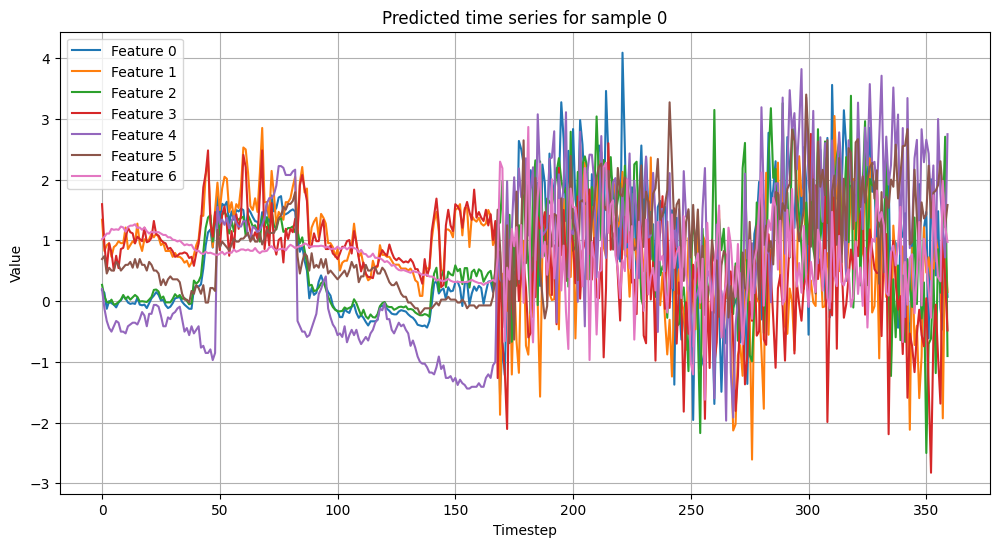

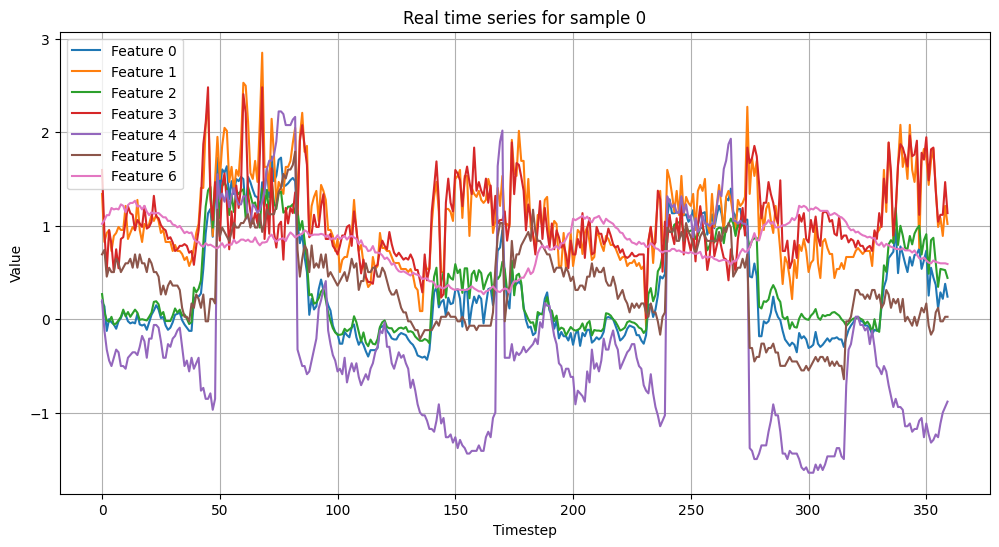

In [36]:
# x: (B, T, D)
sample_idx = 0
x_sample = output.cpu()[sample_idx].detach().numpy()  # shape: (T, D)

plt.figure(figsize=(12, 6))
for d in range(D):
    plt.plot(x_sample[:, d], label=f'Feature {d}')
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.title(f"Predicted time series for sample {sample_idx}")
plt.legend()
plt.grid(True)
plt.show()

x_sample = xb.cpu()[sample_idx].detach().numpy()  # shape: (T, D)

plt.figure(figsize=(12, 6))
for d in range(D):
    plt.plot(x_sample[:, d], label=f'Feature {d}')
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.title(f"Real time series for sample {sample_idx}")
plt.legend()
plt.grid(True)
plt.show()


# Training

In [37]:
# Data augmentation functions

def jitter(x, sigma=0.01):
    noise = torch.randn_like(x) * sigma
    return x + noise

def scaling(x, scale_std=0.1):
    scale = torch.normal(mean=1.0, std=scale_std, size=(x.shape[0], 1, x.shape[2])).to(x.device)
    return x * scale

def time_stretch(x, scale_range=(0.9, 1.1)):
    B, T, C = x.size()
    scale = torch.FloatTensor(B).uniform_(*scale_range).to(x.device)
    stretched = []
    for i in range(B):
        t_len = int(T * scale[i])
        stretched_x = F.interpolate(x[i].unsqueeze(0).permute(0, 2, 1), size=t_len, mode='linear', align_corners=False)
        if t_len > T:
            stretched_x = stretched_x[:, :, :T]  # crop
        else:
            pad_len = T - t_len
            stretched_x = F.pad(stretched_x, (0, pad_len))  # pad
        stretched.append(stretched_x.permute(0, 2, 1))
    return torch.cat(stretched, dim=0)

def masking_augment_fast(x, mask_ratio=0.15, mask_value=0.0):
    mask = torch.bernoulli(torch.full(x.shape[:2], mask_ratio)).bool().to(x.device)
    x = x.clone()
    x[mask] = mask_value
    return x

In [38]:
# class to apply the data augmentations stochastically
class SequentialAugment:
    def __init__(self, augments):
        """
        augments: list of (augment_fn, probability)
        """
        self.augments = augments  

    def __call__(self, x):
        for augment_fn, prob in self.augments:
            if random.random() < prob:  # apply with probability
                x = augment_fn(x)
        return x

augment = SequentialAugment([
    (jitter, 0.7),
    (scaling, 0.5),
    (time_stretch, 0.3),
    # (masking_augment_fast, 0.9)
])

In [39]:
# training function with early stopping

def train_ratd(
    model,
    train_loader,
    encoder=None,
    retrieval_db=None,
    k=K,
    val_loader=None,
    epochs=10,
    lr=1e-4,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    save_path='best_model.pt',
    patience=5,
    drop_prob = 0.5
):
    orig_len = model.original_len
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.5,
        patience=2,
        min_lr=1e-8
    )
    criterion = nn.MSELoss()

    best_val_loss = float('inf')
    start_epoch = 1
    epochs_no_improve = 0  # contatore per early stopping

    # === Recover Checkpoint ===
    if os.path.exists(save_path):
        checkpoint = torch.load(save_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        best_val_loss = checkpoint['best_val_loss']
        print(f"Checkpoint found. Restart from epoch {start_epoch} with best_val_loss {best_val_loss:.6f}.")

    for epoch in range(start_epoch, epochs + 1):
        model.train()
        train_loss = 0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch} [Train]")
        for x, timestamps, _ in pbar:
            # === Data Augmentation ===
            x = augment(x)
            # retrieve the top-k similar series
            if random.random() < drop_prob:
                xr = None
                x, timestamps = x.to(device), timestamps.to(device)
            else : 
                xr = retrieve_knn(x[:, 0:orig_len, :], encoder, faiss_index, xr_target, k=k, device=device)
                x, xr, timestamps = x.to(device), xr.to(device), timestamps.to(device)

            optimizer.zero_grad()
            loss = model.calc_loss(x, timestamps, xr=xr)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item()
            pbar.set_postfix(loss=loss.item())

        avg_train_loss = train_loss / len(train_loader)
        print(f"Epoch {epoch}: Train Loss = {avg_train_loss:.6f}")

        # === VALIDATION ===
        if val_loader is not None:
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for x, timestamps, _ in val_loader:
                    x, timestamps = x.to(device), timestamps.to(device)
                    pred = model(x, timestamps)
                    loss = criterion(pred[:, orig_len:, :], x[:, orig_len:, :])
                    val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            print(f"Epoch {epoch}: Val MSE = {avg_val_loss:.6f}")

            scheduler.step(avg_val_loss)

            # === Check improvement for early stopping ===
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                epochs_no_improve = 0
                torch.save({
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'scheduler_state_dict': scheduler.state_dict(),
                    'epoch': epoch,
                    'best_val_loss': best_val_loss
                }, save_path)
                print(f"Saved best model at {save_path}")
            else:
                epochs_no_improve += 1

            # === Early Stopping ===
            if epochs_no_improve >= patience:
                print(f"Early stopping triggered after {epoch} epochs. Best Val Loss = {best_val_loss:.6f}")
                break

# Training without reference

We trained the model without using the reference for the generation process, to see how this affect on the quality of the predictions made by the model.

In [40]:
!rm /kaggle/working/models/ratd_best_without_reference.pt

In [41]:
B, orig_len, D = 32, 168, 7
K = 3
C = 4
side_dim = 48
emb_dim = 16
T = orig_len + 192

alt_model = NsRATD(
    input_dim=D,
    channels=C,
    context_dim=K,
    side_dim=side_dim,
    emb_dim=emb_dim,
    original_len=orig_len,
    seq_len=T,
    n_layers=20,
    # freeze_estimators = False
).to(device)

print(f"RATD parameters: {count_parameters(alt_model):,}")

RATD parameters: 598,049


In [42]:
train_ratd(
    model=alt_model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=100,
    lr=1e-3,
    save_path="models/ratd_best_without_reference.pt",
    drop_prob = 1.0
)

Epoch 1 [Train]: 100%|██████████| 1084/1084 [01:27<00:00, 12.35it/s, loss=4.47]


Epoch 1: Train Loss = 5.076162
Epoch 1: Val MSE = 22.619500
Saved best model at models/ratd_best_without_reference.pt


Epoch 2 [Train]: 100%|██████████| 1084/1084 [01:27<00:00, 12.34it/s, loss=3.76]


Epoch 2: Train Loss = 2.822897
Epoch 2: Val MSE = 26.477464


Epoch 3 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.27it/s, loss=2.26]


Epoch 3: Train Loss = 2.356688
Epoch 3: Val MSE = 27.928399


Epoch 4 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.25it/s, loss=2.34]


Epoch 4: Train Loss = 2.252429
Epoch 4: Val MSE = 28.168314


Epoch 5 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.27it/s, loss=2.2] 


Epoch 5: Train Loss = 2.215511
Epoch 5: Val MSE = 28.496654


Epoch 6 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.28it/s, loss=1.96]


Epoch 6: Train Loss = 2.173314
Epoch 6: Val MSE = 28.507594
Early stopping triggered after 6 epochs. Best Val Loss = 22.619500


In [43]:
train_ratd(
    model=alt_model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=100,
    lr=1e-3,
    save_path="models/ratd_best_without_reference.pt",
    drop_prob = 1.0
)

Checkpoint found. Restart from epoch 2 with best_val_loss 22.619500.


Epoch 2 [Train]: 100%|██████████| 1084/1084 [01:29<00:00, 12.15it/s, loss=2.28]


Epoch 2: Train Loss = 2.843016
Epoch 2: Val MSE = 26.341191


Epoch 3 [Train]: 100%|██████████| 1084/1084 [01:29<00:00, 12.08it/s, loss=2.17]


Epoch 3: Train Loss = 2.343630
Epoch 3: Val MSE = 28.405989


Epoch 4 [Train]: 100%|██████████| 1084/1084 [01:29<00:00, 12.16it/s, loss=1.91]


Epoch 4: Train Loss = 2.259340
Epoch 4: Val MSE = 28.682211


Epoch 5 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.25it/s, loss=2.2] 


Epoch 5: Train Loss = 2.198992
Epoch 5: Val MSE = 28.641980


Epoch 6 [Train]: 100%|██████████| 1084/1084 [01:28<00:00, 12.24it/s, loss=2.1] 


Epoch 6: Train Loss = 2.198025
Epoch 6: Val MSE = 28.561679
Early stopping triggered after 6 epochs. Best Val Loss = 22.619500


# Training with reference

In [44]:
"!rm /kaggle/working/models/ratd_best.pt"

'!rm /kaggle/working/models/ratd_best.pt'

In [45]:
"""B, orig_len, D = 32, 168, 7
K = 3
C = 16
side_dim = 48
emb_dim = 16
T = orig_len + 192

model = NsRATD(
    input_dim=D,
    channels=C,
    context_dim=K,
    side_dim=side_dim,
    emb_dim=emb_dim,
    original_len=orig_len,
    seq_len=T,
    n_layers=3
).to(device)

print(f"RATD parameters: {count_parameters(model):,}")"""

'B, orig_len, D = 32, 168, 7\nK = 3\nC = 16\nside_dim = 48\nemb_dim = 16\nT = orig_len + 192\n\nmodel = NsRATD(\n    input_dim=D,\n    channels=C,\n    context_dim=K,\n    side_dim=side_dim,\n    emb_dim=emb_dim,\n    original_len=orig_len,\n    seq_len=T,\n    n_layers=3\n).to(device)\n\nprint(f"RATD parameters: {count_parameters(model):,}")'

In [46]:
"""train_ratd(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=10,
    lr=2.5e-4,
    save_path="models/ratd_best.pt",
    drop_prob = 0.0
)"""

'train_ratd(\n    model=model,\n    train_loader=train_loader,\n    val_loader=val_loader,\n    epochs=10,\n    lr=2.5e-4,\n    save_path="models/ratd_best.pt",\n    drop_prob = 0.0\n)'

# Results

In [47]:
B, orig_len, D = 32, 168, 7
K = 3
C = 4
side_dim = 48
emb_dim = 16
T = orig_len + 192

alt_model = NsRATD(
    input_dim=D,
    channels=C,
    context_dim=K,
    side_dim=side_dim,
    emb_dim=emb_dim,
    original_len=orig_len,
    seq_len=T,
    n_layers=20,
    # freeze_estimators = False
).to(device)

"""model = NsRATD(
    input_dim=D,
    channels=C,
    context_dim=K,
    side_dim=side_dim,
    emb_dim=emb_dim,
    original_len=orig_len,
    seq_len=T,
    n_layers=3
).to(device)"""

'model = NsRATD(\n    input_dim=D,\n    channels=C,\n    context_dim=K,\n    side_dim=side_dim,\n    emb_dim=emb_dim,\n    original_len=orig_len,\n    seq_len=T,\n    n_layers=3\n).to(device)'

In [48]:
"""checkpoint = torch.load("models/ratd_best.pt", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()"""

checkpoint = torch.load("models/ratd_best_without_reference.pt", map_location=device)
alt_model.load_state_dict(checkpoint['model_state_dict'])
alt_model.eval()

NsRATD(
  (ldte): LearnableDiffusionTimestepEmbedding(
    (embedding): Embedding(20, 16)
  )
  (side_module): SideInformation()
  (layers): ModuleList(
    (0-19): 20 x DenoisingLayer(
      (rma): MultiHeadRMA(
        (q_proj): Linear(in_features=7, out_features=128, bias=True)
        (k_proj): Linear(in_features=14, out_features=128, bias=True)
        (v_proj): Linear(in_features=21, out_features=128, bias=True)
        (out): Linear(in_features=128, out_features=7, bias=True)
      )
      (time_feature_conv): CausalConv2d(
        (conv): Conv2d(48, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (diff_timestep_emb_conv): Conv1d(16, 360, kernel_size=(3,), stride=(1,), padding=(1,))
      (ln): LayerNorm((1, 360, 7), eps=1e-05, elementwise_affine=True)
      (temporal_transformer): TemporalTransformer(
        (transformer): LinearAttentionTransformer(
          (layers): SequentialSequence(
            (layers): ModuleList(
              (0): ModuleList(
   

In [49]:
for xb, timestamps, _ in test_loader:
    break
xb, timestamps= xb.to(device), timestamps.to(device)
x_in = xb.detach().clone()
x_in[:, orig_len:, :] = torch.randn_like(x_in[:, orig_len:, :])
alt_output = alt_model(x_in, timestamps)

In [50]:
print(alt_output)

tensor([[[ 0.6856,  1.2425,  0.8117,  ..., -0.4730,  0.4536, -0.8260],
         [ 0.5370,  1.2425,  0.7349,  ..., -0.5605,  0.4536, -0.8182],
         [ 0.6286,  0.7602,  0.7156,  ..., -0.5605,  0.6919, -0.8260],
         ...,
         [-2.3418,  0.6707,  0.6800,  ...,  3.6324,  0.8201,  4.1172],
         [ 2.5831,  2.0615, -1.0159,  ...,  0.4549, -1.0124,  2.0424],
         [-1.9102, -1.0715,  0.7738,  ..., -0.6995, -0.5344,  8.4102]],

        [[ 0.5370,  1.2425,  0.7349,  ..., -0.5605,  0.4536, -0.8182],
         [ 0.6286,  0.7602,  0.7156,  ..., -0.5605,  0.6919, -0.8260],
         [ 0.7314,  1.1782,  0.8438,  ..., -0.4730,  0.6919, -0.8106],
         ...,
         [-5.0320,  2.1172, -2.9244,  ...,  0.2072,  2.5870,  3.5667],
         [-0.3361,  0.9640, -1.5450,  ...,  4.4853,  2.8507,  2.9861],
         [ 0.5603, -0.1898, -0.8804,  ...,  1.9906,  1.1636,  1.7319]],

        [[ 0.6286,  0.7602,  0.7156,  ..., -0.5605,  0.6919, -0.8260],
         [ 0.7314,  1.1782,  0.8438,  ..., -0

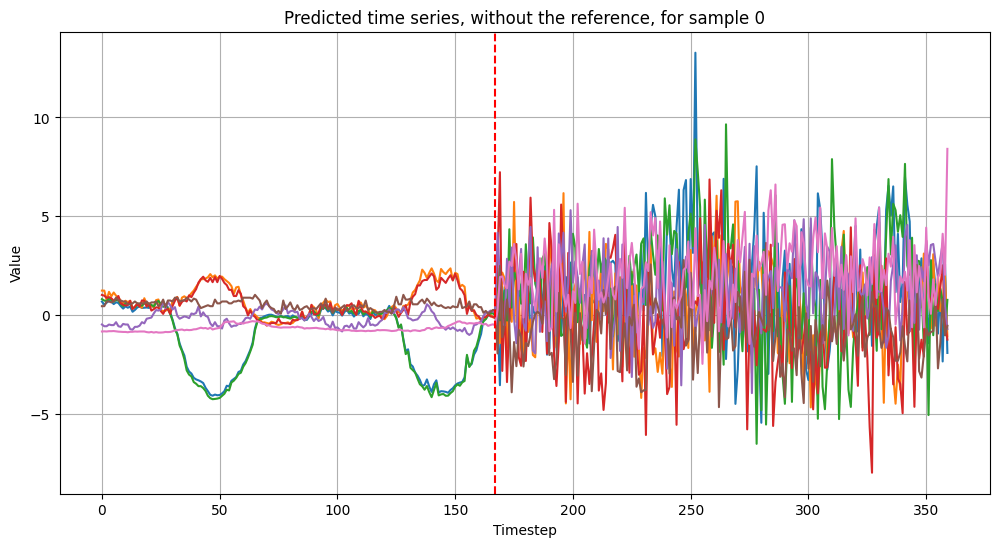

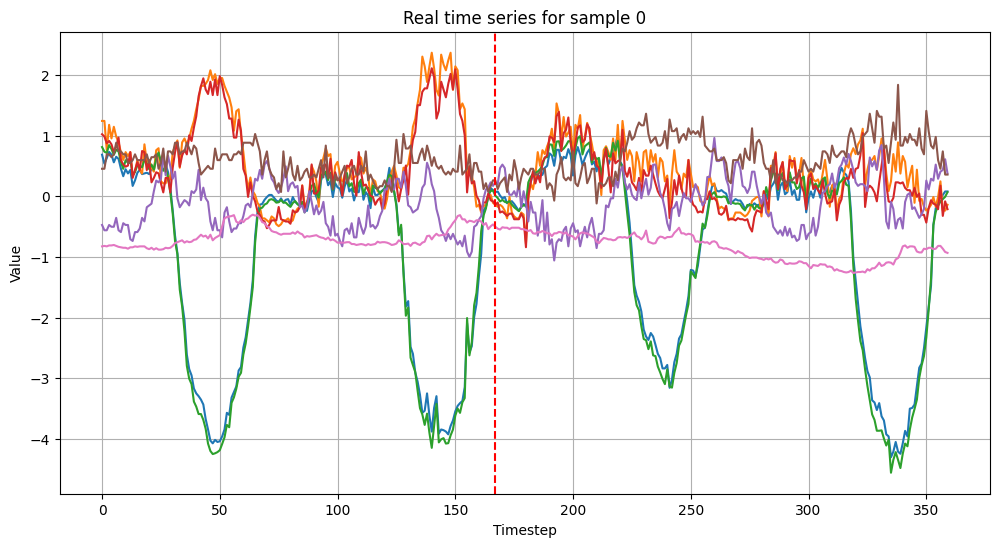

In [51]:
# x: (B, T, D)
# for sample_idx in range(B):
sample_idx = 0    
x_sample = alt_output.cpu()[sample_idx].detach().numpy()  # shape: (T, D)

plt.figure(figsize=(12, 6))
for d in range(D):
    plt.plot(x_sample[:, d])
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.title(f"Predicted time series, without the reference, for sample {sample_idx}")
plt.axvline(x=orig_len - 1, color='red', linestyle='--')
plt.grid(True)
plt.show()

"""x_sample = output.cpu()[sample_idx].detach().numpy()  # shape: (T, D)

plt.figure(figsize=(12, 6))
for d in range(D):
    plt.plot(x_sample[:, d])
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.title(f"Predicted time series for sample {sample_idx}")
plt.axvline(x=orig_len - 1, color='red', linestyle='--')
plt.grid(True)
plt.show()"""

x_sample = xb.cpu()[sample_idx].detach().numpy()  # shape: (T, D)

plt.figure(figsize=(12, 6))
for d in range(D):
    plt.plot(x_sample[:, d])
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.title(f"Real time series for sample {sample_idx}")
plt.axvline(x=orig_len - 1, color='red', linestyle='--')
plt.grid(True)
plt.show()

The visual and statistical (0.084 vs 0.143 of MSE) results acknowledge the improvement brought by the guidance of a reference during the generation process.

In [52]:
checkpoint = torch.load("models/ratd_best_without_reference.pt", map_location=device)
alt_model.load_state_dict(checkpoint['model_state_dict'])
alt_model.eval()

NsRATD(
  (ldte): LearnableDiffusionTimestepEmbedding(
    (embedding): Embedding(20, 16)
  )
  (side_module): SideInformation()
  (layers): ModuleList(
    (0-19): 20 x DenoisingLayer(
      (rma): MultiHeadRMA(
        (q_proj): Linear(in_features=7, out_features=128, bias=True)
        (k_proj): Linear(in_features=14, out_features=128, bias=True)
        (v_proj): Linear(in_features=21, out_features=128, bias=True)
        (out): Linear(in_features=128, out_features=7, bias=True)
      )
      (time_feature_conv): CausalConv2d(
        (conv): Conv2d(48, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (diff_timestep_emb_conv): Conv1d(16, 360, kernel_size=(3,), stride=(1,), padding=(1,))
      (ln): LayerNorm((1, 360, 7), eps=1e-05, elementwise_affine=True)
      (temporal_transformer): TemporalTransformer(
        (transformer): LinearAttentionTransformer(
          (layers): SequentialSequence(
            (layers): ModuleList(
              (0): ModuleList(
   

In [53]:
criterion = nn.MSELoss()
test_loss_per_feature = torch.zeros(D)
test_loss = 0

with torch.no_grad():
    for xb, timestamps, _ in test_loader:
        xb, timestamps = xb.to(device), timestamps.to(device)
        x_in = xb.detach().clone()
        x_in[:, orig_len:, :] = torch.randn_like(x_in[:, orig_len:, :])
        output = alt_model(x_in, timestamps)

        batch_loss = 0
        for i in range(D):
            loss = criterion(output[:, orig_len:, i], xb[:, orig_len:, i])
            loss_value = loss.item()
            test_loss_per_feature[i] += loss_value
            batch_loss += loss_value
        
        test_loss += batch_loss / D  # Average per feature, per batch

avg_test_loss = test_loss / len(test_loader)
test_loss_per_feature = test_loss_per_feature / len(test_loader)

In [54]:
print(f"Test MSE = {avg_test_loss:.6f}")

Test MSE = 28.421869


In [55]:
criterion = nn.MSELoss()
val_loss_per_feature = torch.zeros(D)
val_loss = 0

with torch.no_grad():
    for xb, timestamps, _ in val_loader:
        xb, timestamps = xb.to(device), timestamps.to(device)
        x_in = xb.detach().clone()
        x_in[:, orig_len:, :] = torch.randn_like(x_in[:, orig_len:, :])
        output = alt_model(x_in, timestamps)

        batch_loss = 0
        for i in range(D):
            loss = criterion(output[:, orig_len:, i], xb[:, orig_len:, i])
            loss_value = loss.item()
            val_loss_per_feature[i] += loss_value
            batch_loss += loss_value
        
        val_loss += batch_loss / D  # Average per feature, per batch

avg_val_loss = val_loss / len(val_loader)
val_loss_per_feature = val_loss_per_feature / len(val_loader)

KeyboardInterrupt: 

In [ ]:
print(f"Val MSE = {avg_val_loss:.6f}")

In [ ]:
alt_model.eval()
loss_fn = nn.MSELoss()
total_loss = 0
with torch.no_grad():
    for xb, timestamps, _  in val_loader:
        xb, timestamps = xb.to(device), timestamps.to(device) 
        x_hat = alt_model(xb, timestamps)
        loss = loss_fn(x_hat[:, 168:, :],xb[:, 168:, :])
        total_loss += loss.item()
            
print(total_loss / len(val_loader))

In [ ]:
criterion = nn.MSELoss()
test_loss_per_feature = torch.zeros(D)
test_loss = 0

with torch.no_grad():
    for xb, timestamps, _ in test_loader:
        xr = retrieve_knn(xb[:, 0:orig_len, :], encoder_loaded, faiss_index, xr_target, k=3, device=device)
        xb, xr, timestamps = xb.to(device), xr.to(device), timestamps.to(device)
        x_in = xb.detach().clone()
        x_in[:, orig_len:, :] = torch.randn_like(x_in[:, orig_len:, :])
        output = model(x_in, timestamps, xr)

        batch_loss = 0
        for i in range(D):
            loss = criterion(output[:, orig_len:, i], xb[:, orig_len:, i])
            loss_value = loss.item()
            test_loss_per_feature[i] += loss_value
            batch_loss += loss_value
        
        test_loss += batch_loss / D  # Average per feature, per batch

avg_test_loss = test_loss / len(test_loader)
test_loss_per_feature = test_loss_per_feature / len(test_loader)

In [ ]:
print(f"Test MSE = {avg_test_loss:.6f}")

In [ ]:
criterion = nn.MSELoss()
val_loss_per_feature = torch.zeros(D)
val_loss = 0

with torch.no_grad():
    for xb, timestamps, _ in val_loader:
        xr = retrieve_knn(xb[:, 0:orig_len, :], encoder_loaded, faiss_index, xr_target, k=3, device=device)
        xb, xr, timestamps = xb.to(device), xr.to(device), timestamps.to(device)
        x_in = xb.detach().clone()
        x_in[:, orig_len:, :] = torch.randn_like(x_in[:, orig_len:, :])
        output = model(x_in, timestamps, xr)

        batch_loss = 0
        for i in range(D):
            loss = criterion(output[:, orig_len:, i], xb[:, orig_len:, i])
            loss_value = loss.item()
            val_loss_per_feature[i] += loss_value
            batch_loss += loss_value
        
        val_loss += batch_loss / D  # Average per feature, per batch

avg_val_loss = val_loss / len(val_loader)
val_loss_per_feature = val_loss_per_feature / len(val_loader)

In [ ]:
print(f"Val MSE = {avg_val_loss:.6f}")

In [ ]:
mean_values = mean[0][0].tolist()
std_values = std[0][0].tolist()
test_mse_values = test_loss_per_feature.tolist()
val_mse_values = val_loss_per_feature.tolist()

# Create a DataFrame
data = []
for i in range(D):
    row = {
        'Feature': i,
        'Mean': round(mean_values[i], 4),
        'Std': round(std_values[i], 4),
        'Test MSE': round(test_mse_values[i], 4),
        'Val MSE': round(val_mse_values[i], 4)
    }
    data.append(row)

df = pd.DataFrame(data, columns=["Feature", "Mean", "Std", "Test MSE", "Val MSE"])

df = df.sort_values(by=["Test MSE", "Val MSE"], ascending=[False, False]).reset_index(drop=True)

# Visualize
styled = df.style.set_caption("Feature-Level Summary Statistics") \
                 .format("{:.4f}", subset=["Mean", "Std", "Test MSE", "Val MSE"]) \
                 .background_gradient(subset=["Test MSE", "Val MSE"], cmap="Reds") \
                 .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px')]}])

display(styled)

The performance was measured using the Mean Squared Error (MSE) metric. On the validation set, the model achieved a MSE of 0.084, while on the test set it achieved a slightly lower MSE of 0.082, indicating good generalization capabilities. A more detailed analysis revealed that, among all features, only one, the median_list_price, exhibited a significantly higher error, with a MSE of approximately 0.86 on the test set. Notably, this particular feature also had a standard deviation more than ten times larger than its onw mean, there were some outliers that made difficult to generalize on this feature, while other features presented a standard deviation close to or lower than the mean.
Overall, the results indicate robust performance across most features, with the exception of the outlier feature influenced by its inherent statistical characteristics.

# Final Considerations

The results obtained in our experiments are promising and show comparable performance to those reported in the reference paper. Specifically, despite working with a similar number of features, our model achieved prediction errors in a similar range, indicating that our architecture and preprocessing pipeline were effective. While we attempted to replicate the experimental conditions as closely as possible, including the use of publicly available platforms such as Kaggle for training, it is important to note that we did not have access to the same computational resources as the original study. This limitation may have affected training duration, batch size, and model complexity. Nevertheless, the similarity in the results suggests that our implementation closely resembles the original approach, both in design and in effectiveness, reinforcing the validity of our experimental setup.